# Venus Altimetry Modelling - Terrain Image Generation
The Open University<br>
Module SXS841 Masters level project in physical sciences<br>
***
End of Module Assignment (EMA) 01<br>
Stuart Gavin Smith<br>
H1872126<br>
06 January 2025<br>
Version:1.0<br>
***

==============================MAGELLAN ALTIMETRY DATA==================================


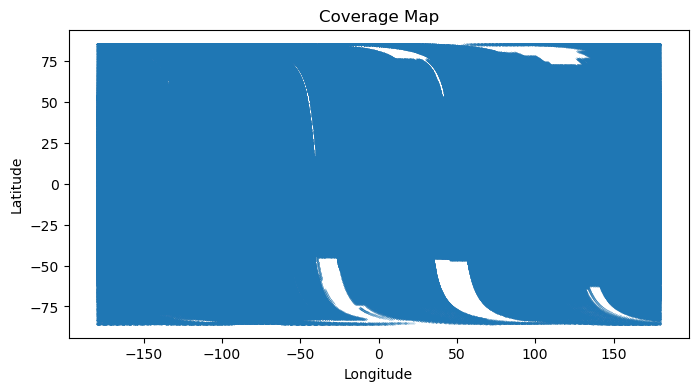

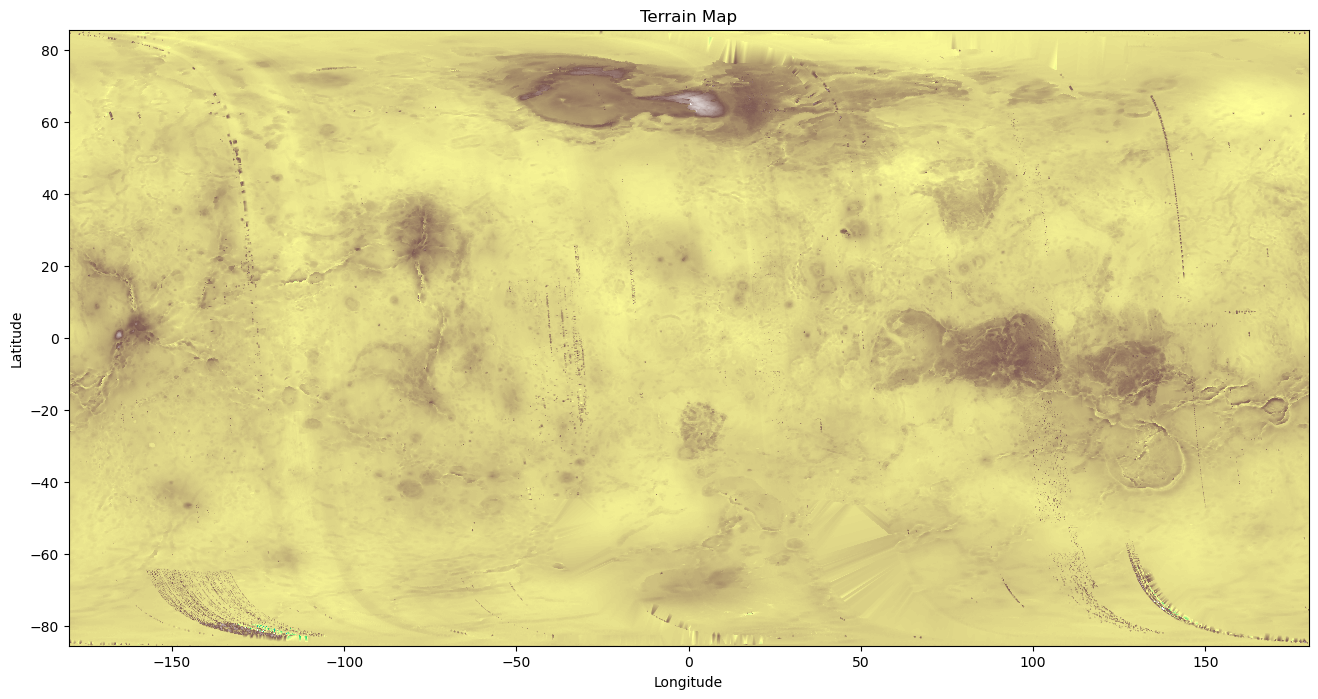

====================================END OF PROCESSING==================================


In [1]:
import datashader as ds, pandas as pd, colorcet
import calendar
from urllib.request import urlretrieve
import datetime
import sys
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
from numpy import  *
import xml.etree.ElementTree as ET
import struct
import matplotlib.pyplot as plt
from matplotlib import cm
from datashader.colors import viridis
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
import datashader as ds, datashader.transfer_functions as tf, numpy as np
import dask.dataframe as dd
import xarray as xr
from xrspatial import generate_terrain
import matplotlib.colors as colors
%matplotlib inline

print("==============================MAGELLAN ALTIMETRY DATA==================================")

#Get the atltimetry data (pre-processed CSV)
ALTIMETRY_DATA =r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Altimetry Modelling\AltimetryData.csv'

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    #Filename is not stored in the CSV, but a column of character 'P', will use this to store the filename
    dfAltDataRaw=read_csv(ALTIMETRY_DATA, skiprows=1,names=['LongS', 'LatS', 'AltS'])
except:
    print("ALTIMETRY_DATA Venus data does not exist, or some other error")
    Error = True
    exit()

#Create the Long,Lat,Alt dataframe
dfAltData = DataFrame()
dfAltData['Long'] = single(dfAltDataRaw['LongS'])
dfAltData['Lat'] = single(dfAltDataRaw['LatS'])
dfAltData['Alt'] = single(dfAltDataRaw['AltS'])

#Process out bad alititude data
dfAltData.loc[dfAltData['Alt'] < 4500, 'Alt'] = 6035.08935546875
minpoint = dfAltData['Alt'].min()
meanpoint =  dfAltData['Alt'].mean() 

#Move the "floor" of the data (to zero)
dfAltData['Alt'] = (dfAltData['Alt']-minpoint)
dfAltData['Alt'] = (dfAltData['Alt']-meanpoint)

#Shift the data to create '-180+180 longitude map'
dfAltData.loc[dfAltData['Long'] >= 180.0, 'Long'] = dfAltData['Long'] - 360.0

#Output a simple scatter plot to show data coverage from Magellan survey
plt.figure(figsize=(8, 4))
plt.scatter(x=dfAltData['Long'], y=dfAltData['Lat'], s=0.01)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coverage Map')
plt.savefig(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Altimetry Modelling\Magellan Coverage.png', dpi=300, bbox_inches='tight') 
plt.show()


#Create the detailed terrain map from evenely spaced long,lat co-ordinates
lon = np.linspace(dfAltData['Long'].min(), dfAltData['Long'].max(), 25000)
lat = np.linspace(dfAltData['Lat'].min(), dfAltData['Lat'].max(), 25000)
lon_grid,lat_grid = np.meshgrid(lon, lat)

# Interpolate altitude data onto the grid
from scipy.interpolate import griddata
alt_grid = griddata(
    (dfAltData['Long'], dfAltData['Lat']), dfAltData['Alt'],
    (lon_grid, lat_grid), method ="linear"
)

#Plot the contoured data in terrain colour map from Matplotlib
plt.figure(figsize=(16, 8))
N=1000
plt.contourf(lon_grid, lat_grid, alt_grid, N,cmap='terrain') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Terrain Map')
plt.savefig(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Altimetry Modelling\Magellan Terrain.png', dpi=300, bbox_inches='tight') 
plt.show()

print("====================================END OF PROCESSING==================================")

